In [8]:
'''
Author:        James Parkington
Created Date:  7/29/2023
Modified Date: 7/29/2023

Any imports that are shared across cells can be imported through this initial cell. I've also introduced some 
runtime configuration parameters to define attributes of each chart once, so that they're treated as defaults 
for each subsequent plot.
'''

import numpy             as np
import pandas            as pd
import seaborn           as sns
import scipy             as sci
import matplotlib.pyplot as plt

from cycler   import cycler
from datetime import datetime as dtt
from typing   import *

plot_params = {
    # Axes parameters                            # Tick parameters
    'axes.facecolor'     : 'black',              'xtick.labelsize'    : 8,
    'axes.grid'          : False,                'xtick.color'        : 'white',
    'axes.labelcolor'    : 'white',              'xtick.major.size'   : 0,
    'axes.spines.left'   : False,                'ytick.labelsize'    : 8,
    'axes.spines.right'  : False,                'ytick.color'        : 'white',
    'axes.spines.top'    : False,                'ytick.major.size'   : 0,
    'axes.labelsize'     : 10,
    'axes.labelweight'   : 'bold',               # Color cycles
    'axes.titlesize'     : 12,                   'axes.prop_cycle'    : cycler(color = sns.color_palette('Set2')),
    'axes.titleweight'   : 'bold',               'image.cmap'         : 'Set2',
    'axes.labelpad'      : 15,                   'legend.borderpad'   : 0.75,          

    # Grid parameters                            # Figure parameters
    'grid.linestyle'     : ':',                  'figure.facecolor'   : 'black',
    'grid.color'         : '0.5',                'figure.figsize'     : (15, 10),

    # Font and text parameters                   # Color cycles  
    'font.family'        : 'DejaVu Sans Mono',   'legend.facecolor'   : '0.3',
    'font.size'          : 8,                    'legend.edgecolor'   : '0.3',
    'font.style'         : 'normal',             'legend.borderpad'   : 0.75, 
    'text.color'         : 'white',              'legend.framealpha'  : '0.5'}

plt.rcParams.update(plot_params)

1. What is the busiest month of the year for bike rentals? Can this information guide marketing and staffing decisions?
2. What are the busiest and slowest days of the week for bike rentals? Could this information guide staffing or promotional events?
3. What are the top 5 busiest hours for bike rentals for each season? Could this information guide staffing decisions?
4. Were there any days where the expected pattern of rentals across weekday and hour did not hold?
5. Are there specific hours of the day that see a sharp increase or decrease in bike rentals across different weather situations? Could this information guide preparations for sudden surges or drops in demand?
6. During which hours do casual users tend to rent more bikes compared to registered users? What marketing strategies could be developed based on this information?
7. Do registered users show different rental patterns compared to casual users across seasons, weather, and time of day? Could this information guide user-specific strategies?
8. How does the distribution of bike rentals differ between casual and registered users across different weather conditions? Could this information guide user-specific strategies?
9. How does the number of bike rentals change from month to month for registered users versus casual users? Could this information guide user-specific marketing or loyalty programs?
10. Do bike rentals increase on holidays due to an increase in casual users or registered users? Could this information guide targeted holiday promotions or communications?
11. What weather conditions lead to the biggest drop in rentals? How could the company mitigate this?
12. How does the number of bike rentals vary during different weather situations on holidays? Could this information guide staffing and inventory decisions?
13. How do bike rentals change during different weather situations on working days? Could this information help with demand prediction and planning?
14. Do specific weather conditions affect casual users more than registered users? Could this information guide user-specific communication or service strategies?
15. How does temperature correlate with the number of bike rentals? How could this information be used for demand forecasting?
16. How does the combination of temperature, humidity, and wind speed affect bike rentals across different seasons? Could this information guide service planning and user communication?
17. How does a working day versus a non-working day impact bike rentals across different seasons? Could this information guide staffing and inventory management?
18. How does bike rental behavior change between 2011 and 2012? Can we attribute this to specific factors in the dataset?
19. How do rental patterns change during holiday seasons? Could promotional holiday packages be introduced to boost rentals?
20. During what hours are bikes least used? Could these times be used for maintenance or other activities?
21. Can we predict the number of bike rentals for a given hour based on the weather situation, temperature, humidity, and wind speed?
22. Which season has the highest number of rentals? Could this information be used for season-specific marketing or events?
23. How does humidity impact the number of rentals? Could this information be used to inform renters or guide marketing strategies?
24. How does wind speed correlate with bike rentals? Do windy conditions discourage rentals?
25. Given the patterns and trends in the data, what strategic recommendations would you make to a company operating a bike rental service?

In [2]:
def load_bike_sharing_data() -> pd.DataFrame:   
    '''
    Loads the Bike Sharing Dataset from the UCI Machine Learning Repository.

    The dataset represents two years (2011 and 2012) of the hourly count of rental bikes from the Capital 
    Bikeshare system in Washington D.C., USA. The counts are categorized as casual, registered, or total, with 
    additional information about the specific hour, weather conditions, and more.

    The dataset includes the following fields:

    - instant     (int)   : Record index
    - dteday      (str)   : Date
    - season      (int)   : Season (1: spring, 2: summer, 3: autumn, 4: winter)
    - yr          (int)   : Year (0: 2011, 1: 2012)
    - mnth        (int)   : Month (1 to 12)
    - hr          (int)   : Hour (0 to 23)
    - holiday     (int)   : Whether the day is a holiday or not
    - weekday     (int)   : Day of the week
    - workingday  (int)   : 1 if the day is neither a weekend nor holiday, otherwise 0
    - weathersit  (int)   : Weather conditions (1: clear, 2: mist/cloudy, 3: light snow/rain, 4: heavy rain/snow/fog)
    - temp        (float) : Normalized temperature in Celsius (values divided by 41)
    - atemp       (float) : Normalized feeling temperature in Celsius (values divided by 50)
    - hum         (float) : Normalized humidity (values divided by 100)
    - windspeed   (float) : Normalized wind speed (values divided by 67)
    - casual      (int)   : Count of casual users
    - registered  (int)   : Count of registered users
    - cnt         (int)   : Count of total rental bikes including both casual and registered

    After loading the dataset, we'll conduct an exploratory data analysis to uncover the underlying patterns 
    and relationships in the data. This will include a variety of techniques such as data visualization, 
    aggregation, and correlation analysis.

    Returns:
        pd.DataFrame: The Bike Sharing dataset as a pandas DataFrame.
    '''

    df = pd.read_csv("./Data/hour.csv")
    return df

bike_sharing = load_bike_sharing_data()
bike_sharing

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


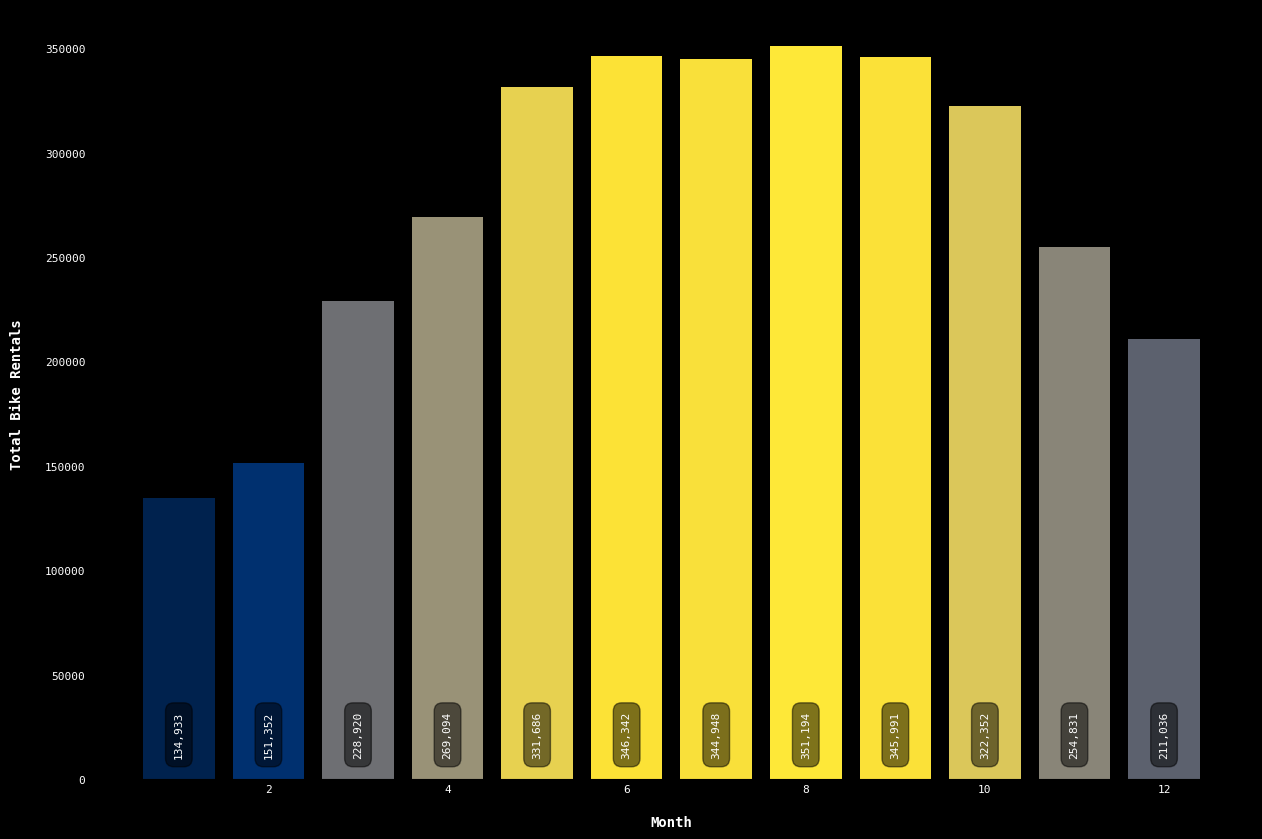

In [3]:
# 1. What is the busiest month of the year for bike rentals?

def busiest_month(df : pd.DataFrame) -> str:
    '''
    Finds and visualizes the busiest month of the year for bike rentals with a heatmap-like color scheme.
    
    This function groups the data by month and sums the total counts of bike rentals for each month.
    The result is visualized using a bar plot with a heatmap-like color palette, where the color intensity
    corresponds to the number of rentals, providing a visually compelling representation of the busiest months.

    Parameters:
        df (pd.DataFrame) : The bike sharing dataset as a pandas DataFrame.
    
    Insights drawn from this analysis could be valuable for making informed decisions regarding marketing campaigns, 
    staffing, inventory management, etc. For instance, during the busiest month, bike-sharing companies might want 
    to increase their marketing efforts to maximize profit, ensure they have sufficient staff to handle the increased 
    demand, and make sure they have enough bikes in inventory to meet customer needs.
    '''

    month_counts = df.groupby('mnth')['cnt'].sum()
    norm         = plt.Normalize(month_counts.min(), month_counts.max())
    
    bars = plt.bar(x      = month_counts.index, 
                   height = month_counts.values, 
                   color  = plt.cm.cividis(norm(month_counts.values)))
    
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, 10000, f'{int(bar.get_height()):,}',
                 va = 'bottom', ha = 'center', rotation = 90,
                 bbox = dict(facecolor = '0', alpha = 0.5, boxstyle = 'round, pad = 0.75'))
    
    plt.xlabel('Month')
    plt.ylabel('Total Bike Rentals')

busiest_month(bike_sharing)

### <span style="color:#0693e3">**Analysis for Question 1**</span>

The results above indicate that the busiest month for bike rentals is August, with a total of **351,194** rentals, closely followed by June and July with **346,342** and **344,948** rentals respectively. The dataset has some clear <span style="color:#0693e3">**seasonality**</span>, since the total number of rentals significantly increases starting from March, reaches its peak in August, and then gradually decreases towards the end of the year. This pattern corresponds to the warmer and more pleasant weather conditions during the spring and summer months.

These insights can be extremely valuable for both operational and strategic decision-making in a hypothetical bike rental company:

- <span style="color:#0693e3">**Inventory Management**</span>  
  High demand months like June, July, and August require sufficient inventory to cater to the increased customer base. Preparation for these months should start well in advance to ensure a smooth supply of bikes.
 
- <span style="color:#0693e3">**Staffing**</span>  
  Higher demand implies more customer interactions, which necessitates increased staffing during these months. This could be in the form of customer service representatives, maintenance staff, or even delivery personnel for companies that offer a drop-off and pick-up service.
 
- <span style="color:#0693e3">**Marketing and Promotions**</span>  
  Marketing campaigns and promotional offers can be strategically timed around these high-demand months to attract new customers and encourage existing customers to use the service more frequently. Conversely, targeted campaigns during the off-peak months can help maintain a flow of rentals during these down periods.
  
- <span style="color:#0693e3">**Pricing Strategy**</span>  
  Dynamic pricing strategies can be adopted where prices are slightly increased during high-demand months, or special discounts are provided during off-peak months to encourage rentals.

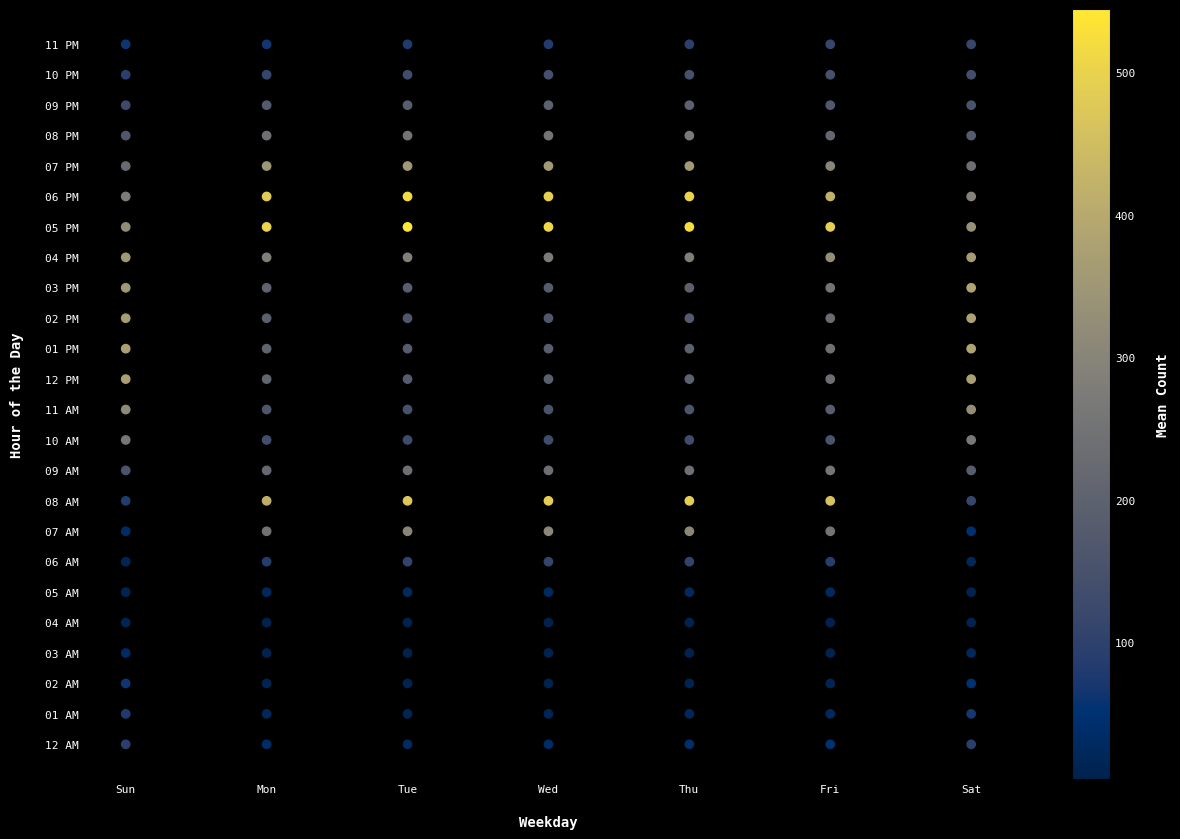

In [4]:
# 2. What are the busiest and slowest weekdays for bike rentals?

def busiest_slowest_weekdays(df : pd.DataFrame):
    '''
    Finds and visualizes the busiest and slowest weekdays for bike rentals with a scatterplot. Each point's size
    and color indicate the mean number of rentals at that specific weekday and hour.
    
    This function adds a `weekday` column to the DataFrame, groups the data by weekday and hour, then calculates 
    the mean number of bike rentals for each weekday-hour combination. The size and color of the points in the 
    scatterplot represent the mean number of rentals, allowing for a clear visualization of the demand for rentals 
    throughout the week.
    
    Parameters:
        df (pd.DataFrame) : The bike sharing dataset as a pandas DataFrame.
    
    The insights from this analysis could be useful in scheduling staff hours and planning promotional events. 
    For instance, staff levels could be increased during busy periods to ensure good customer service, while 
    promotional events could be scheduled during slower periods to boost demand.
    '''

    weekday_hour_counts = df.groupby(['weekday', 'hr'])['cnt'].mean().reset_index()

    plt.scatter(x    = weekday_hour_counts['weekday'], 
                y    = weekday_hour_counts['hr'], 
                c    = weekday_hour_counts['cnt'], 
                cmap = 'cividis')
    
    plt.xticks(range(7),  ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', "Fri", 'Sat'])
    plt.yticks(range(24), [dtt.strptime(str(i), "%H").strftime("%I %p") for i in range(24)])
    plt.xlabel('Weekday')
    plt.ylabel('Hour of the Day')
    plt.colorbar(label = 'Mean Count')

busiest_slowest_weekdays(bike_sharing)

### <span style="color:#0693e3">**Analysis for Question 2**</span>

The scatter plot above provides a detailed view of the average number of bike rentals for every hour of each day of the week. The size and color of each point indicate the mean count of bike rentals, with larger, more red points representing higher counts.

Here are some key observations from the plot:

- <span style="color:#0693e3">**Weekday Patterns**</span>  
  On weekdays (Monday to Friday), the busiest times are around 8 AM and 5 PM, aligning with typical commuting hours. This suggests that a significant portion of the demand during these days comes from commuters.
  
- <span style="color:#0693e3">**Weekend Patterns**</span>  
  On weekends (Saturday and Sunday), demand peaks around 1 PM to 4 PM, indicating a shift towards leisure or non-commute usage.

- <span style="color:#0693e3">**Slowest Times**</span>  
  The slowest times, across all days of the week, are in the early morning hours (from 12 AM to 5 AM), when most people are likely asleep.

Analyzing these bike rental patterns can help a bike-sharing company optimize both operations and promotions. Staffing could be dynamically adjusted based on the expected demand. More personnel could be scheduled for weekday mornings and late afternoons to accommodate commuting riders, while weekend afternoons might need increased staff to handle leisure riders. When the demand is lower, we have an opportunity to boost it with targeted promotional events. For instance, late-night ride events with special discounts could encourage usage during early morning hours. Likewise, marketing campaigns could be tailored to the observed patterns, emphasizing commuting by bike on weekdays and promoting leisurely rides on weekends. Through these strategies, we can effectively cater to the existing customer habits and potentially stimulate new demand.

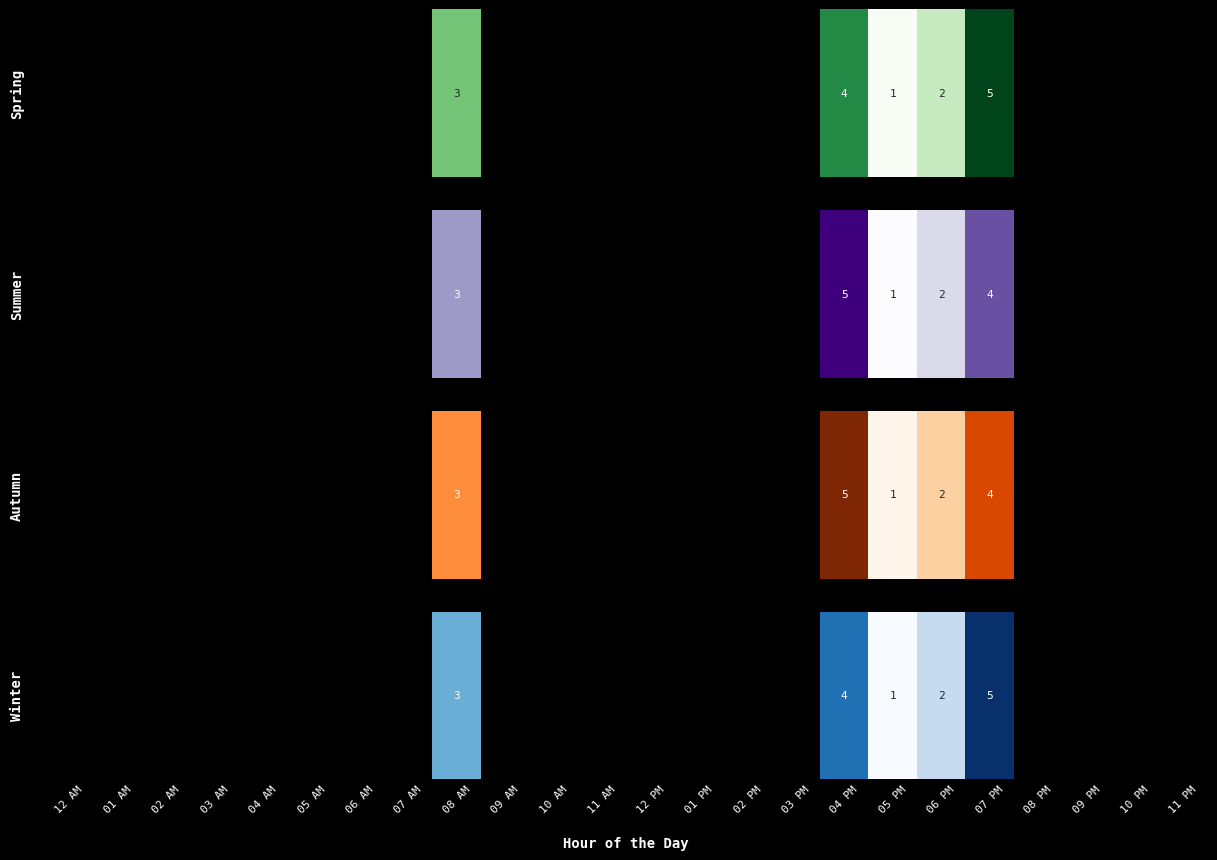

In [5]:
# 3. What are the top 5 busiest hours for bike rentals for each season?

def top_5_hours_each_season(df : pd.DataFrame):
    '''
    Finds and visualizes the top 5 busiest hours for bike rentals for each season using a heatmap. Each cell in 
    the heatmap is colored based on its ranking within each season, with the busiest hour ranked as 1.

    This function creates a pivot table from the input DataFrame, calculating the mean count of bike rentals for each 
    combination of season and hour. That pivot table is then ranked to find the top 5 busiest hours for each season. 
    The function then plots a heatmap subplot for each season with hours on the x-axis. 
    
    The color of each cell in the heatmap corresponds to the rank of the hour within the season, with different color 
    schemes for each season. 

    Parameters:
        df (pd.DataFrame) : The bike sharing dataset as a pandas DataFrame.

    This information could guide staffing decisions by indicating when more staff may be needed to handle 
    increased demand during peak hours in different seasons.
    '''

    heatmap = df.pivot_table(index = 'season', columns = 'hr', values = 'cnt', aggfunc = 'mean') \
                .rank(axis = 1, method = 'min', ascending = False) \
                .where(lambda x: x <= 5)

    _, axs = plt.subplots(4, 1, sharex = True)
    colors = {1: ['Spring', 'Greens'], 
              2: ['Summer', 'Purples'], 
              3: ['Autumn', 'Oranges'], 
              4: ['Winter', 'Blues']}

    for i, ax in enumerate(axs, start = 1):
        sns.heatmap(heatmap.loc[[i]], 
                    cmap  = colors[i][1], 
                    annot = True, 
                    cbar  = False, 
                    ax    = ax) \
           .set(yticks = [], xlabel = '', ylabel = colors[i][0])

    axs[-1].set_xticks(np.arange(0.5, 24.5, 1))
    axs[-1].set_xticklabels([dtt.strptime(str(i), "%H").strftime("%I %p") for i in range(24)], rotation = 45)
    plt.xlabel('Hour of the Day')

top_5_hours_each_season(bike_sharing)

### <span style="color:#0693e3">**Analysis for Question 3**</span>
The heatmap provides us with the top 5 busiest hours for bike rentals during each season, based on mean counts. Regardless of the season, it appears that the demand for bike rentals peaks at two main periods: around 8 AM and between 4 PM to 7 PM. This indicates a pattern that aligns with typical commuting hours.

<span style="color:#0693e3">**Consistent Intraday Demand Across Seasons**</span>  
Despite changes in weather and daylight hours across seasons, the demand for bike rentals during commuting hours remains consistently high. This could indicate that a significant proportion of users are using the bikes for daily commuting, which is not largely affected by seasonal changes. Because of this, a prospective bike-sharing company could allow for routine maintenance work to be scheduled during the less busy hours to cause minimal disruption to the service.

This consistent pattern of demand, regardless of season, provides valuable insight for the bike-sharing company to better staff resources and improve customer service, since year-long patterns are known and invariable in ways that the program's weekday patterns aren't.

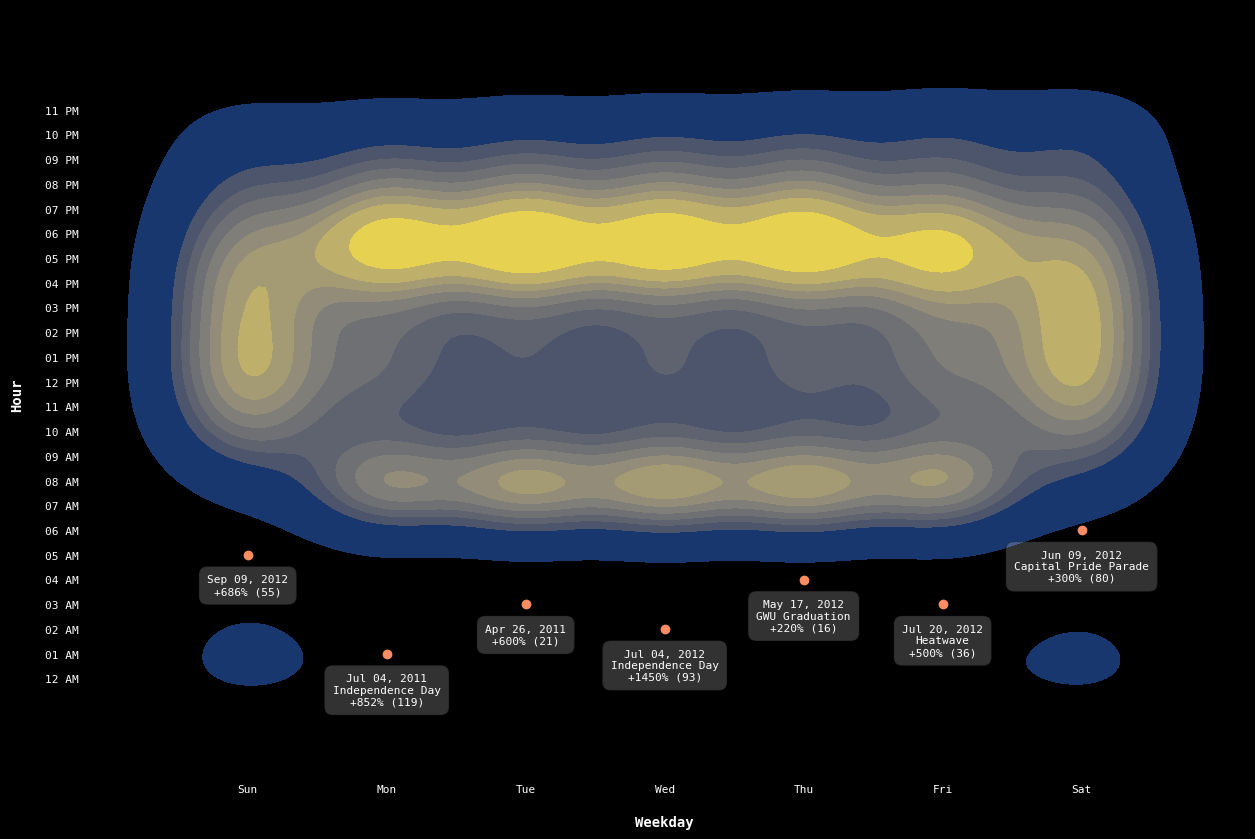

In [6]:
# 4. Were there any anomalous days, in which the expected pattern of rentals across weekday and hour did not hold?

def deviations_from_expected(df : pd.DataFrame):
    '''
    The color of each cell in the heatmap corresponds to the rank of the hour within the season, with different color 
    Analyzes and visualizes the deviations from the expected pattern of bike rentals, grouped by weekday and hour.

    This function primarily performs the following steps:

    1. Calculates the median number of rentals for each unique combination of weekday and hour as 'expected' rentals.
    2. Computes the relative difference between the actual and expected rentals for each data entry.
    3. Identifies the most anomalous day for each weekday (the day with the highest relative difference).
    4. Visualizes the results using a Kernel Density Estimation (KDE) plot, where the anomalies are highlighted.

    The anomalies are marked with a date, associated significant events (if any), and the relative difference in the 
    number of rentals. Significant events are specified manually.

    Parameters:
        df (pd.DataFrame) : The bike sharing dataset as a pandas DataFrame.

    The purpose of this function is to provide insight into when and how often the actual demand significantly deviates 
    from the usual pattern. Such deviations could be caused by a variety of factors such as weather conditions, public 
    events, etc. 
    
    By identifying these anomalies, a prospective bike sharing company could better understand the underlying causes and 
    potentially incorporate them into their demand forecasting models and promotional materials.
    '''
    
    expected_rentals = df.groupby(['weekday', 'hr'])['cnt'].median().rename('median')
    df               = df.merge(expected_rentals, left_on = ['weekday', 'hr'], right_index = True)
    df['diff']       = (df['cnt'] - df['median']) / df['median']
    anomalous_days   = df.loc[df.groupby('weekday')['diff'].idxmax()]
    events           = {0 : None,
                        1 : "Independence Day",
                        2 : None,
                        3 : "Independence Day",
                        4 : "GWU Graduation",
                        5 : "Heatwave",
                        6 : "Capital Pride Parade"}

    sns.kdeplot(x       = df["weekday"], 
                y       = df["hr"], 
                weights = df["cnt"], 
                fill    = True,
                cmap    = 'cividis')
    plt.scatter(anomalous_days['weekday'], 
                anomalous_days['hr'])

    def create_label(row):
        event = events.get(row['weekday'], '')
        line  = f"{event}\n" if event else ""
        return f"{pd.to_datetime(row['dteday']).strftime('%b %d, %Y')}\n{line}{row['diff'] * 100:+.0f}% ({row['cnt']})"

    for (weekday, hr), label in zip(anomalous_days[['weekday', 'hr']].values, anomalous_days.apply(create_label, axis = 1)):
        plt.text(weekday, hr - 0.8, label, ha = 'center', va = 'top', 
                 bbox = dict(facecolor = '1', alpha = 0.2, boxstyle = 'round, pad = 0.75'))

    plt.xticks(range(7),  ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', "Fri", 'Sat'])
    plt.yticks(range(24), [dtt.strptime(str(i), "%H").strftime("%I %p") for i in range(24)])
    plt.xlabel('Weekday')
    plt.ylabel('Hour')

deviations_from_expected(bike_sharing)

### <span style="color:#0693e3">**Analysis for Question 4**</span>
This chart examines 7 anomalous data points, representing bike rentals significantly different from the expected trend on a certain day and hour.

- <span style="color:#0693e3">**2012-09-09, Hour 5**</span> (Sunday): A total of **55** rentals were observed, which is a 685% increase from the typical 7 rentals at this hour on Sundays. No specific event is known to have occurred on this day, but it's possible that a local or minor event not listed in the dataset influenced these numbers.
  
- <span style="color:#0693e3">**2011-07-04, Hour 1**</span> (Monday): There were **119** rentals recorded, marking an 852% increase from the typical median of 12.5 rentals at this hour on Mondays. This date is significant because it's Independence Day in the United States, which likely caused the spike in bike rentals.
  
- <span style="color:#0693e3">**2011-04-26, Hour 3**</span> (Tuesday): There were **21** rentals, a 600% increase over the typical 3 rentals at this hour on Tuesdays. No specific event correlates with this anomaly.
  
- <span style="color:#0693e3">**2012-07-04, Hour 2**</span> (Wednesday): **93** rentals were found, representing a 1,450% increase from the usual 6 rentals at this hour on Wednesdays. As with the previous case, this date represents Independence Day, explaining the increased bike usage.
  
- <span style="color:#0693e3">**2012-05-17, Hour 4**</span> (Thursday): On this day, **16** rentals were observed, a 220% increase from the typical 5 rentals at this hour on Thursdays. This anomaly corresponds with George Washington University's graduation day, possibly leading to increased bike rentals.
  
- <span style="color:#0693e3">**2012-07-20, Hour 3**</span> (Friday): The data showed **36** rentals, a 500% increase from the typical 6 rentals at this hour on Fridays. This date aligns with a recorded heatwave, which may have influenced people to rent bikes rather than walk or use other forms of transport.
  
- <span style="color:#0693e3">**2012-06-09, Hour 6**</span> (Saturday): **80** rentals were registered, a 300% increase from the usual 20 rentals at this hour on Saturdays. This anomaly corresponds with the Capital Pride Parade, a major event that could have led to the increase in bike rentals.  
  <br>

<span style="color:#0693e3">**Business Takeaways**</span>

1. **Event Tracking**: Monitoring and leveraging local and national events, like parades or holidays, could boost bike rentals. This might mean increased marketing leading up to the event or partnering with event organizers.

2. **Weather Sensitivity**: Weather conditions like heatwaves can impact bike usage. Offering weather-based promotions or preparing for higher demand during certain weather conditions could be beneficial.

3. **Academic Calendar**: University events such as graduation ceremonies can influence bike rental numbers. Establishing partnerships with local universities and offering student discounts or special offers during these times could attract more users.

4. **Exploring Unknown Factors**: Some anomalies are not linked to identifiable events, suggesting other factors are at play. This could be a valuable area for further research and understanding, which could uncover additional opportunities to increase bike rentals.

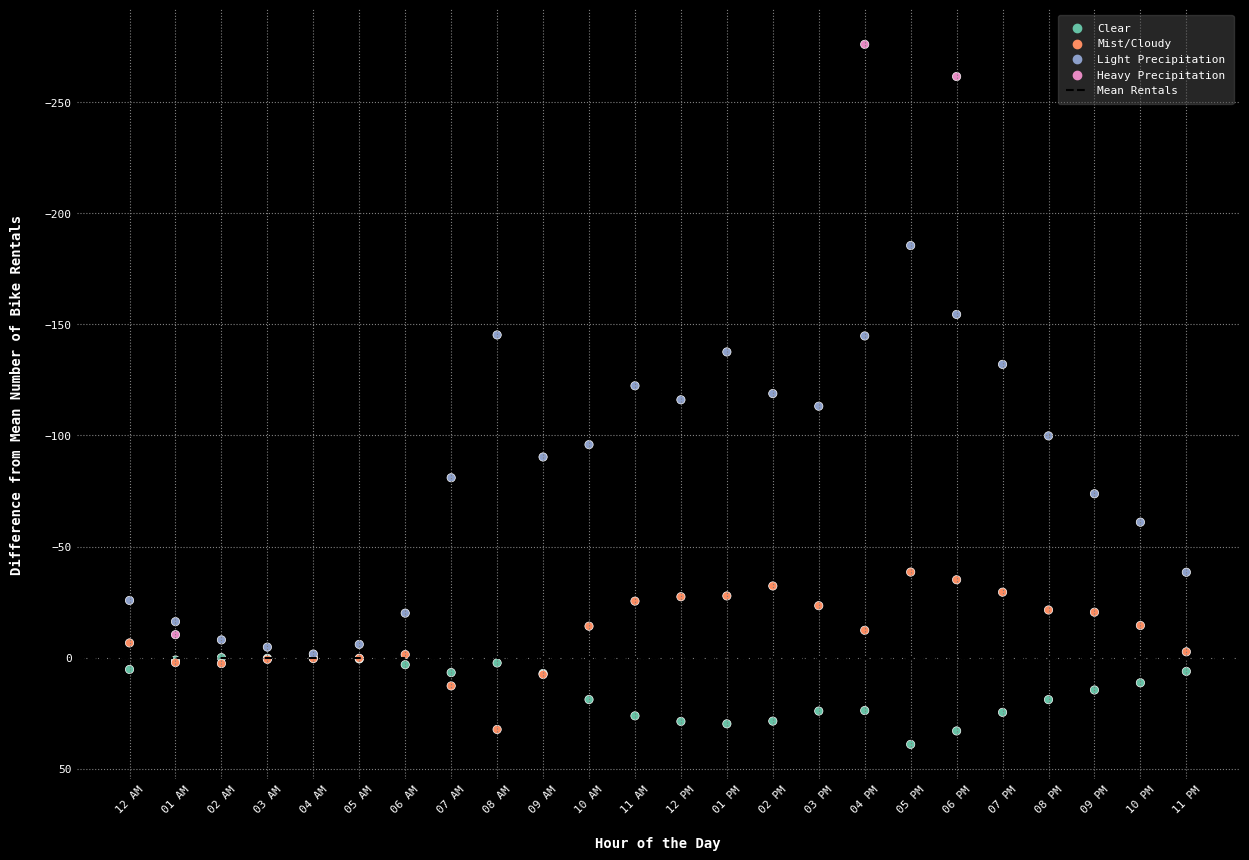

In [12]:
# 5. Are there specific hours of the day that see a sharp increase or decrease in bike rentals across different weather situations?

def hourly_rentals_by_weathersit(df : pd.DataFrame):
    '''
    Visualizes the average difference from the mean number of bike rentals across different hours and weather situations.

    1. Calculates the mean number of rentals for each unique hour.
    2. For each weather situation and hour, calculates the mean number of rentals and then the difference from the mean 
       number of rentals.
    3. Creates a scatter plot where the x-axis represents the hour and the y-axis represents the difference from the mean 
       number of bike rentals, and each point is colored based on the weather situation.
    4. Visualizes a line at y = 0, representing the mean number of rentals.

    Parameters:
        df (pd.DataFrame) : The bike sharing dataset as a pandas DataFrame.

    The purpose of this function is to provide insights into how the time of day and weather situations affect the 
    demand for bike rentals, relative to the mean demand. Understanding these patterns can help a prospective bike sharing 
    company anticipate sudden surges or drops in demand and manage their resources accordingly.
    '''

    weather = {1 : 'Clear', 
               2 : 'Mist/Cloudy', 
               3 : 'Light Precipitation', 
               4 : 'Heavy Precipitation'}

    mean_rentals     = df.groupby('hr')['cnt'].mean()
    weathersit_means = df.groupby(['hr', 'weathersit'])['cnt'].mean().reset_index()
    weathersit_means['weathersit_label'] = weathersit_means['weathersit'].map(weather)
    weathersit_means['diff_from_mean'] = weathersit_means.apply(lambda row: row['cnt'] - mean_rentals[row['hr']], axis = 1)

    plot = sns.scatterplot(x       = 'hr', 
                           y       = 'diff_from_mean', 
                           hue     = 'weathersit_label', 
                           data    = weathersit_means, 
                           palette = 'Set2')

    plt.axhline(0, color = 'black', linestyle = 'dashed', label = 'Mean Rentals')
    plt.xticks(range(24), [dtt.strptime(str(i), "%H").strftime("%I %p") for i in range(24)], rotation = 45)
    plt.gca().invert_yaxis()
    plt.xlabel('Hour of the Day')
    plt.ylabel('Difference from Mean Number of Bike Rentals')
    plt.grid(True)
    plt.legend()

hourly_rentals_by_weathersit(bike_sharing)

### <span style="color:#0693e3">**Analysis for Question 5**</span>
This analysis provides insights into bike rental demand under different weather conditions, across all hours of the day. Four weather situations have been recorded and plotted—**Clear**, **Mist/Cloudy**, **Light Precipitation**, and **Heavy Precipitation**—across 24 hours of the day.

<span style="color:#0693e3">**Weather Impact**</span>  
The weather conditions have a clear impact on the number of bike rentals. For all hours of the day, the mean count of rentals is the highest when the weather is clear, followed by mistry or cloudy conditions. Light precipitation causes a further decrease in the rental counts, and heavy precipitation seems to lower the demand substantially for the few bikes that were rented in those conditions.

<span style="color:#0693e3">**Patterns & Observations**</span>  
While the mean count of bike rentals is naturally affected by the weather conditions, the demand pattern across the hours remains similar irrespective of the weather situation. The commuting hours maintain their status as peak demand hours, even though the actual demand decreases with worsening weather.

This pattern suggests that while the weather has an impact on the level of demand, it does not significantly alter the hours of peak demand. This could indicate that commuters are a major part of the user base, and their need to travel during specific hours is less influenced by weather conditions. That said, one of the most precipitous drops can be see at 5 PM when light rain is present. It seems users leaving work and seeing rain and generally more discouraged from renting a bike.

<span style="color:#0693e3">**Implications for Bike Rental Service**</span>  
Recognizing that demand is sensitive to weather conditions, the service could consider weather-based dynamic management. For instance, during forecasted periods of heavy precipitation, the service could ensure additional provisions are made for protecting the bikes or even explore collaborations with other modes of public transport.

Lastly, given the strong demand during commuting hours, irrespective of weather, the service could consider promoting season passes or commuter-specific discount packages to attract regular users and incentivize off-peak use.